## 1 - Visualizing the distribution

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats, integrate
import matplotlib.pyplot as plt

D:\Python\Anaconda3\envs\tensorflow\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
sns.set(color_codes=True)

In [8]:
np.random.seed(sum(map(ord, "distributions")))

### `sns.distplot()`
plot distribution
- `hist`: 是否显示直方图
- `kde`: 是否显示密度曲线
- `rug`: 是否显示“小地毯”

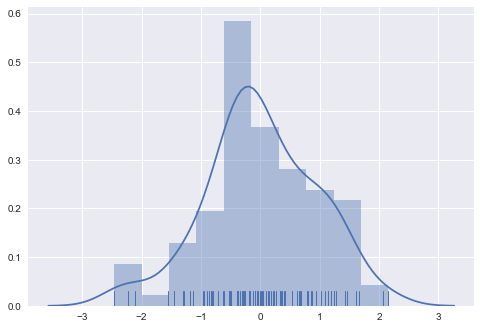

In [24]:
x=np.random.normal(size=100)
sns.distplot(x,rug=True,);

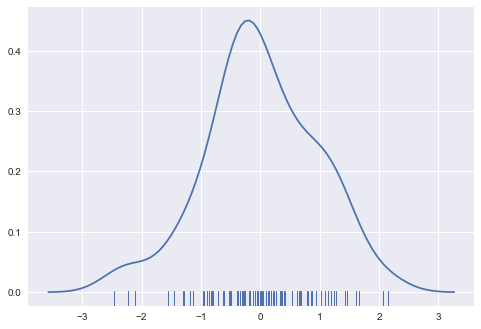

In [35]:
sns.distplot(x, bins=30, rug=True, hist=False);

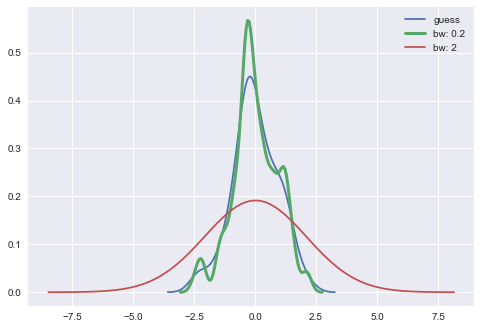

In [46]:
sns.kdeplot(x, label="guess")
sns.kdeplot(x, bw=.2, label="bw: 0.2",lw=3)
sns.kdeplot(x, bw=2, label="bw: 2");

### `sns.kdeplot()`
- `cut` : 曲线两端延伸长度，只影响曲线的位置和比例 ，不影响拟合的结果
- `bw` : 估算概率密度时，直方图的 `bandwidth`

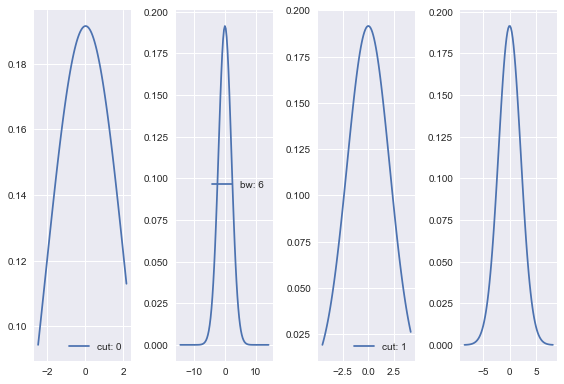

In [67]:
plt.subplot(141)
sns.kdeplot(x, bw=2, label="cut: 0",cut=0);
plt.subplot(142)
sns.kdeplot(x, bw=2, label="bw: 6",cut=6);
plt.subplot(143)
sns.kdeplot(x, bw=2, cut=1 ,label="cut: 1");
plt.subplot(144)
sns.kdeplot(x, bw=2);
plt.tight_layout()

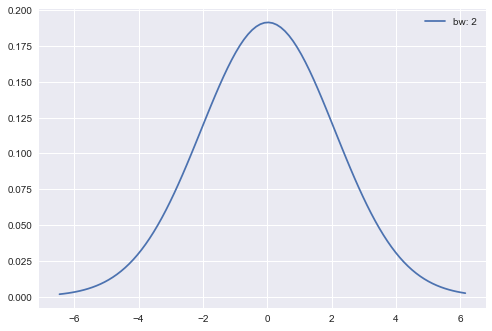

In [52]:
sns.kdeplot(x, bw=2, label="bw: 2",cut=2);

## 2 - Plotting bivariate distributions

### `sns.jointplot()`

In [95]:
mean, cov =[0,1], [(1,.5), (0.5,1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

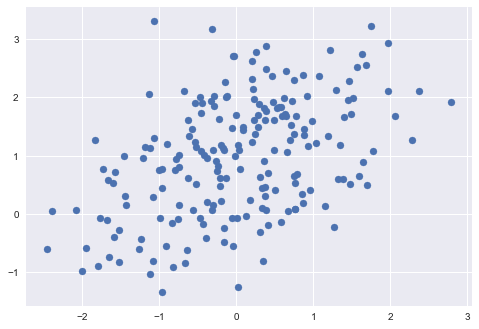

In [96]:
plt.scatter(df["x"],df["y"]);

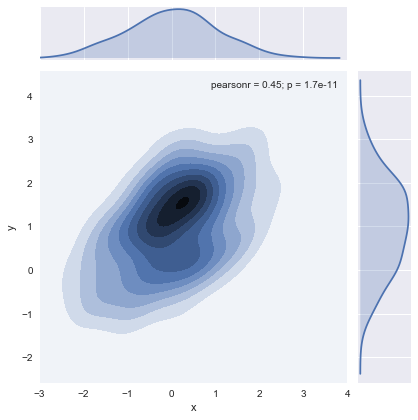

In [112]:
sns.jointplot(x="x", y="y", data=df, kind = "kde",xlim=(-3,4));

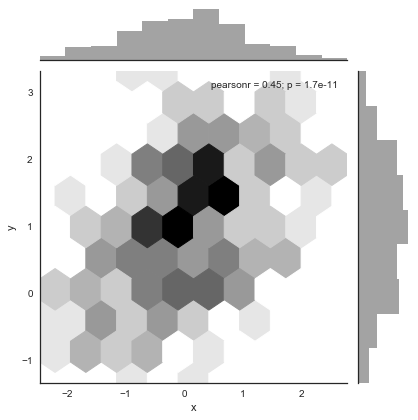

In [111]:
with sns.axes_style("white"):
    sns.jointplot(x="x", y="y", data=df, kind="hex", color="k")

### `sns.rugplot()`

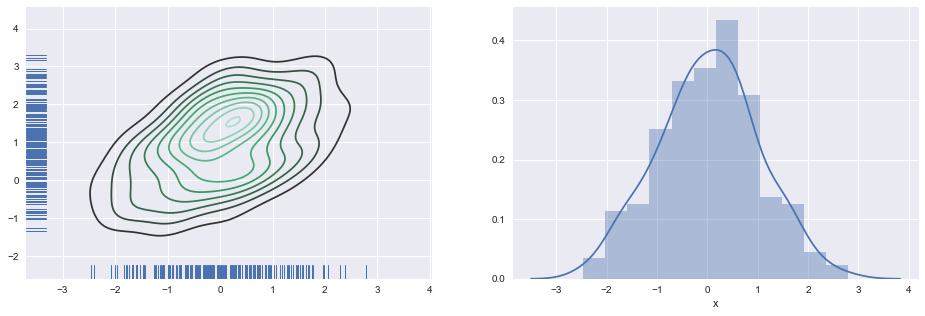

In [141]:
f, axes= plt.subplots(ncols=2,figsize=(16,5))
sns.kdeplot(data=df,ax=axes[0]);
sns.rugplot(df.x, ax=axes[0]);
sns.rugplot(df.y, vertical=True,ax=axes[0]);
sns.distplot(df.x,ax=axes[1]);